In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# transformers to impute missing data with sklearn:

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
# We use only the following variables for the demo

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

data = pd.read_csv("houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [4]:
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [5]:
imputer.statistics_

array([  69. ,    6. ,    0. ,  486.5,  992. , 1095. , 1479. , 1979. ,
          0. ])

In [6]:
X_t=imputer.transform(X_train)

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'MasVnrArea'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'WoodDeckSF'}>]], dtype=object)

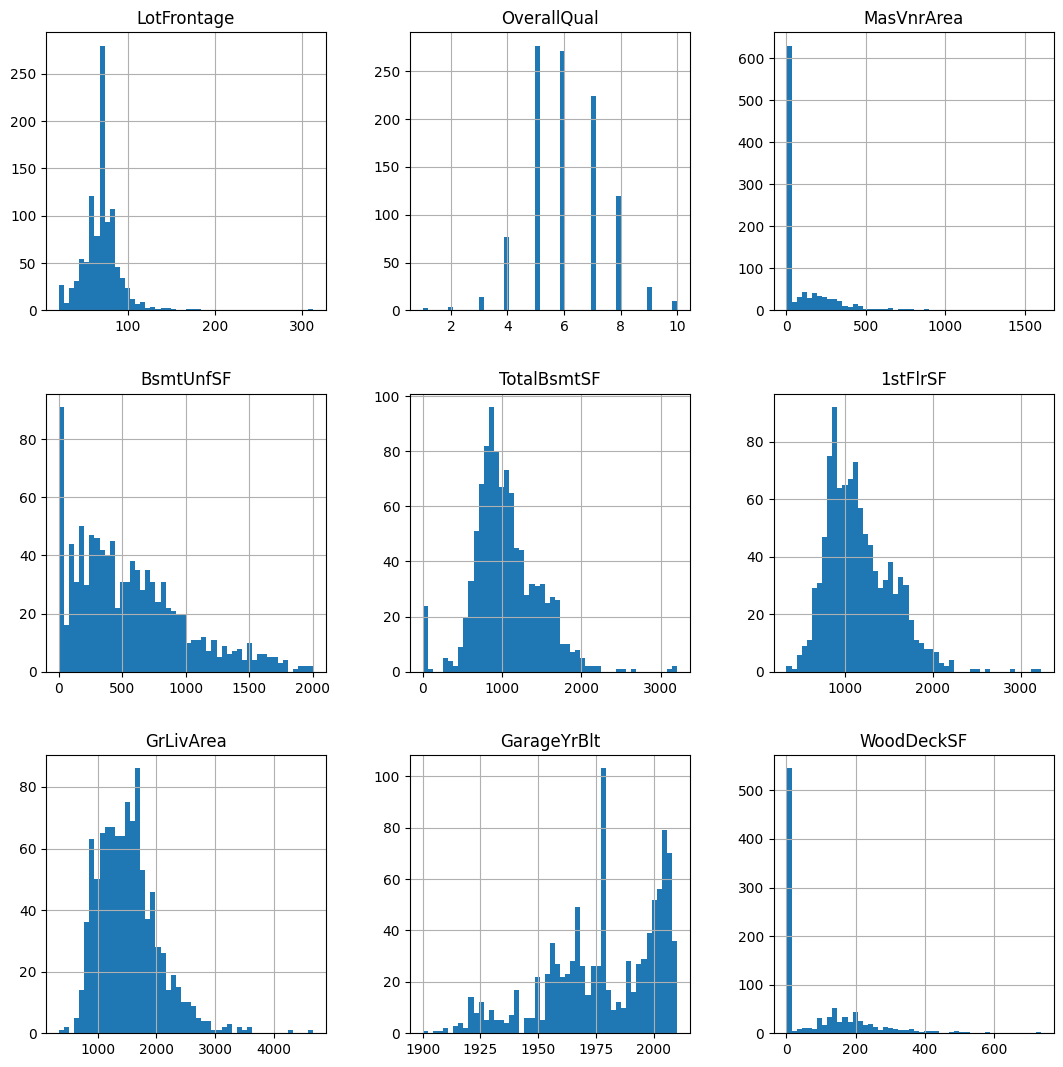

In [28]:
X_t.hist(bins=50,figsize=(13,13))

In [7]:
imputer = ColumnTransformer(
    transformers=[("mean_imputer",SimpleImputer(strategy="mean"),["LotFrontage"]),
                  ("median_imputer",SimpleImputer(strategy="median"),["MasVnrArea","GarageYrBlt"])
                  ], remainder="passthrough"
).set_output(transform="pandas")

imputer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [8]:
imputer.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [9]:
imputer.named_transformers_["mean_imputer"].statistics_

array([69.66866747])

In [10]:
X_t=imputer.transform(X_train)

In [11]:
X_t

,mean_imputer__LotFrontage,median_imputer__MasVnrArea,median_imputer__GarageYrBlt,remainder__OverallQual,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__GrLivArea,remainder__WoodDeckSF
64,69.668667,573.0,1998.0,7,318,1057,1057,2034,576
682,69.668667,0.0,1996.0,6,288,1291,1291,1291,307
960,50.000000,0.0,1979.0,5,162,858,858,858,117
1384,60.000000,0.0,1939.0,6,356,560,698,1258,0
1100,60.000000,0.0,1930.0,2,0,290,438,438,0
...,...,...,...,...,...,...,...,...,...
763,82.000000,673.0,1999.0,8,89,1252,1268,2365,0
835,60.000000,0.0,1996.0,4,625,1067,1067,1067,290
1216,68.000000,0.0,1978.0,6,0,0,1318,1902,0
559,69.668667,18.0,2003.0,7,1374,1374,1557,1557,143


In [13]:
imputer = SimpleImputer(strategy="constant",
                        fill_value=999).set_output(transform="pandas")
X_t=imputer.fit_transform(X_train)

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'MasVnrArea'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'WoodDeckSF'}>]], dtype=object)

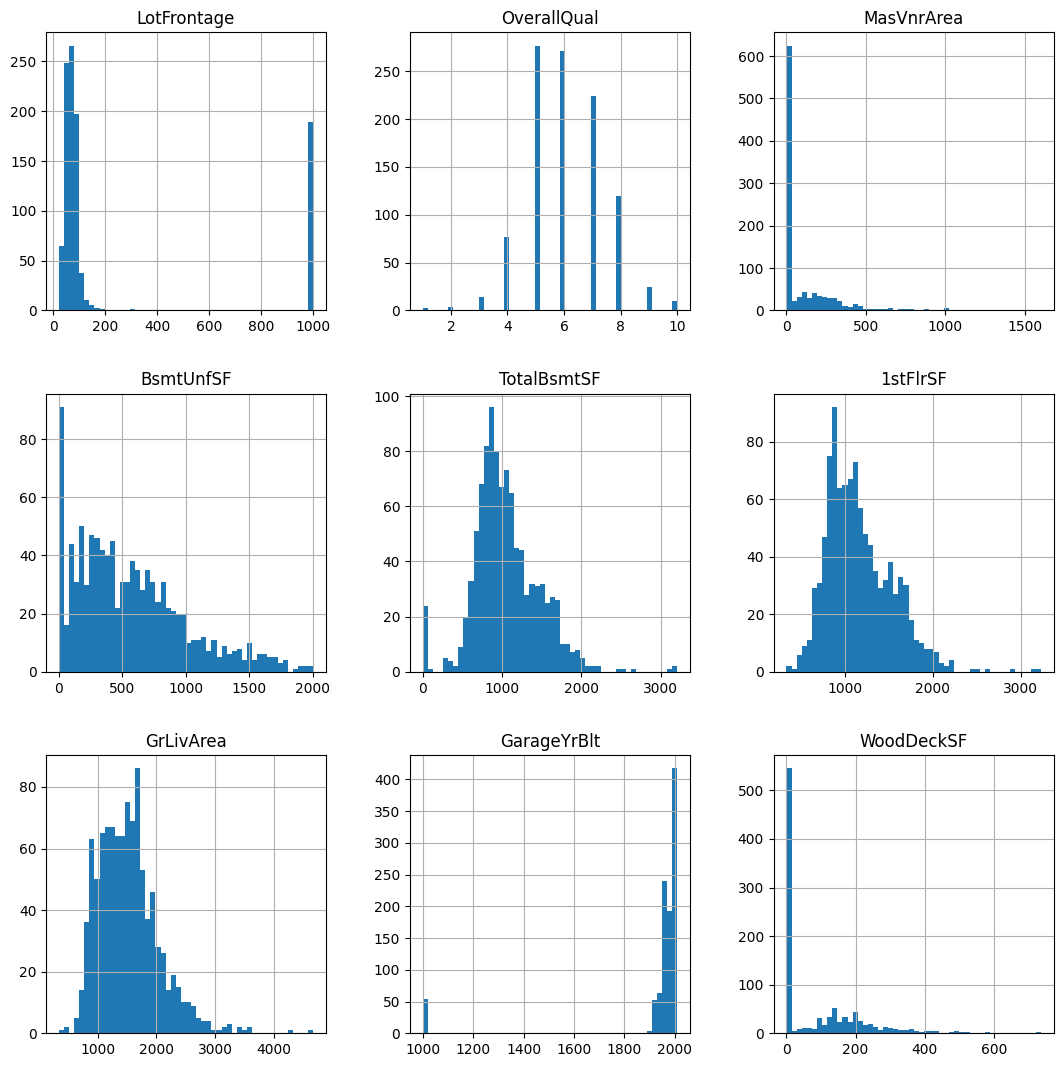

In [55]:
X_t.hist(bins=50,figsize=(13,13))

In [14]:
imputer = SimpleImputer(strategy="most_frequent").set_output(transform="pandas")
imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [15]:
imputer.statistics_

array([  60.,    5.,    0.,    0.,    0.,  864.,  864., 2005.,    0.])

In [17]:
X_train.mode()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
0,60.0,5.0,0.0,0.0,0,864.0,864.0,2005.0,0.0
1,NaN,NaN,NaN,NaN,864,NaN,NaN,NaN,NaN


In [18]:
X_train.mean()

LotFrontage      69.668667
OverallQual       6.079256
MasVnrArea      103.553589
BsmtUnfSF       565.992172
TotalBsmtSF    1055.343444
1stFlrSF       1161.722114
GrLivArea      1522.137965
GarageYrBlt    1978.012397
WoodDeckSF       94.852250
dtype: float64

In [19]:
X_train

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
64,NaN,7,573.0,318,1057,1057,2034,1998.0,576
682,NaN,6,0.0,288,1291,1291,1291,1996.0,307
960,50.0,5,0.0,162,858,858,858,NaN,117
1384,60.0,6,0.0,356,560,698,1258,1939.0,0
1100,60.0,2,0.0,0,290,438,438,1930.0,0
...,...,...,...,...,...,...,...,...,...
763,82.0,8,673.0,89,1252,1268,2365,1999.0,0
835,60.0,4,0.0,625,1067,1067,1067,1996.0,290
1216,68.0,6,0.0,0,0,1318,1902,1978.0,0
559,NaN,7,18.0,1374,1374,1557,1557,2003.0,143


In [20]:
cols_to_use = [
    "BsmtQual",
    "FireplaceQu",
    "MSZoning",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "Street",
    "Alley",
    "SalePrice",
]

data = pd.read_csv("houseprice.csv", usecols=cols_to_use)

data.head()

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [22]:
features_numeric = [
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
]
features_categoric = ["BsmtQual", "FireplaceQu", "MSZoning", "Street", "Alley"]

preprocessor = ColumnTransformer(
    transformers =[
        ("numeric_imp",SimpleImputer(strategy="mean"),features_numeric),
        ("category_imp",SimpleImputer(strategy="most_frequent"),features_categoric)
    ], remainder="passthrough"
).set_output(transform="pandas")

In [23]:
preprocessor.fit_transform(X_train)

,numeric_imp__BsmtUnfSF,numeric_imp__LotFrontage,numeric_imp__MasVnrArea,category_imp__BsmtQual,category_imp__FireplaceQu,category_imp__MSZoning,category_imp__Street,category_imp__Alley
64,318.0,69.668667,573.0,Gd,Gd,RL,Pave,Pave
682,288.0,69.668667,0.0,Gd,Gd,RL,Pave,Pave
960,162.0,50.000000,0.0,TA,Gd,RL,Pave,Pave
1384,356.0,60.000000,0.0,TA,Gd,RL,Pave,Pave
1100,0.0,60.000000,0.0,TA,Gd,RL,Pave,Pave
...,...,...,...,...,...,...,...,...
763,89.0,82.000000,673.0,Gd,Gd,RL,Pave,Pave
835,625.0,60.000000,0.0,Gd,Gd,RL,Pave,Pave
1216,0.0,68.000000,0.0,TA,Gd,RM,Pave,Pave
559,1374.0,69.668667,18.0,Gd,TA,RL,Pave,Pave


In [24]:
X_train.isnull().mean()

MSZoning       0.000000
LotFrontage    0.184932
Street         0.000000
Alley          0.939335
MasVnrArea     0.004892
BsmtQual       0.023483
BsmtUnfSF      0.000000
FireplaceQu    0.467710
dtype: float64

In [25]:
from sklearn.impute import  MissingIndicator
indicator = MissingIndicator(
    error_on_new=True,
    features="missing-only",
).set_output(transform="pandas")

indicator.fit(X_train)

MissingIndicator()

In [26]:
indicator.features_

array([1, 3, 4, 5, 7], dtype=int64)

In [27]:
X_train.columns[indicator.features_]

Index(['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtQual', 'FireplaceQu'], dtype='object')

In [28]:
tmp=indicator.transform(X_train)
tmp

,missingindicator_LotFrontage,missingindicator_Alley,missingindicator_MasVnrArea,missingindicator_BsmtQual,missingindicator_FireplaceQu
64,True,True,False,False,True
682,True,True,False,False,False
960,False,True,False,False,True
1384,False,True,False,False,True
1100,False,True,False,False,True
...,...,...,...,...,...
763,False,True,False,False,False
835,False,True,False,False,True
1216,False,True,False,True,True
559,True,True,False,False,False


In [29]:
X_train = pd.concat([X_train,tmp],axis=1)
X_train

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,missingindicator_LotFrontage,missingindicator_Alley,missingindicator_MasVnrArea,missingindicator_BsmtQual,missingindicator_FireplaceQu
64,RL,NaN,Pave,NaN,573.0,Gd,318,NaN,True,True,False,False,True
682,RL,NaN,Pave,NaN,0.0,Gd,288,Gd,True,True,False,False,False
960,RL,50.0,Pave,NaN,0.0,TA,162,NaN,False,True,False,False,True
1384,RL,60.0,Pave,NaN,0.0,TA,356,NaN,False,True,False,False,True
1100,RL,60.0,Pave,NaN,0.0,TA,0,NaN,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,RL,82.0,Pave,NaN,673.0,Gd,89,Gd,False,True,False,False,False
835,RL,60.0,Pave,NaN,0.0,Gd,625,NaN,False,True,False,False,True
1216,RM,68.0,Pave,NaN,0.0,NaN,0,NaN,False,True,False,True,True
559,RL,NaN,Pave,NaN,18.0,Gd,1374,TA,True,True,False,False,False


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [31]:
imputer = SimpleImputer(strategy="most_frequent",
                        add_indicator=True).set_output(transform="pandas")

imputer.fit_transform(X_train)

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,missingindicator_LotFrontage,missingindicator_Alley,missingindicator_MasVnrArea,missingindicator_BsmtQual,missingindicator_FireplaceQu
64,RL,60.0,Pave,Pave,573.0,Gd,318,Gd,True,True,False,False,True
682,RL,60.0,Pave,Pave,0.0,Gd,288,Gd,True,True,False,False,False
960,RL,50.0,Pave,Pave,0.0,TA,162,Gd,False,True,False,False,True
1384,RL,60.0,Pave,Pave,0.0,TA,356,Gd,False,True,False,False,True
1100,RL,60.0,Pave,Pave,0.0,TA,0,Gd,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,RL,82.0,Pave,Pave,673.0,Gd,89,Gd,False,True,False,False,False
835,RL,60.0,Pave,Pave,0.0,Gd,625,Gd,False,True,False,False,True
1216,RM,68.0,Pave,Pave,0.0,TA,0,Gd,False,True,False,True,True
559,RL,60.0,Pave,Pave,18.0,Gd,1374,TA,True,True,False,False,False


In [32]:
imputer.statistics_

array(['RL', 60.0, 'Pave', 'Pave', 0.0, 'TA', 0, 'Gd'], dtype=object)

In [33]:
import pandas as pd
import numpy as np

# import classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# import classes for modelling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [34]:
data = pd.read_csv("houseprice.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
cats = list(data.select_dtypes(exclude="number"))
nums =[col for col in data.columns if col not in cats and col !="SalePrice"]

In [36]:
data[nums]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [37]:
data[cats]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [38]:

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,
)  # for reproducibility

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [39]:
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())])

categoric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(transformers=[
    ("numerical",numeric_transformer,nums),
    ("categorical",categoric_transformer,cats)])

In [40]:
rgr = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("regressor",Lasso(max_iter=2000))])

In [41]:
param_grid = {
    'preprocessor__numerical__imputer__strategy':["mean","median"],
    'preprocessor__categorical__imputer__strategy':["most_frequent","constant"],
    'regressor__alpha':[1,10,100]
}

grid_search = GridSearchCV(rgr,param_grid,cv=10,n_jobs=-1,scoring="r2")

grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Id',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'Tot...
                                                                          'BsmtCond',
                                                                          'BsmtExposure',
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical', ...])])),
                                       ('regressor', Lasso(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'preprocessor__categorical__imputer__strategy': ['most_frequent',
                                                                          'constant'],
                         'preprocessor__numerical__imputer__strategy': ['mean',
                                                                        'median'],
                         'regressor__alpha': [1, 10, 100]},
             scoring='r2')

In [42]:
grid_search.best_params_

{'preprocessor__categorical__imputer__strategy': 'constant',
 'preprocessor__numerical__imputer__strategy': 'median',
 'regressor__alpha': 100}

In [43]:
grid_search.cv_results_["params"]

[{'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 1},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 10},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 100},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 1},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 10},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 100},
 {'preprocessor__categorical__imputer__strategy': 'constant',
  'preprocessor__numerical__impu

In [44]:
grid_search.score(X_test,y_test)

0.7378313212754584